# **Predict if a candy has chocolate or not based on its features**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('candy-data.csv')

In [3]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


- chocolate - Does it contain chocolate?
- fruity - Is it fruit flavoured?
- caramel - Is there caramel?
- peanutalmond - Does it contain peanuts, peanut butter or almonds?
- nougat - Does it cintain nougat?
- crispeddriedwafer - Does it contain crisped rice, wafers, or a cookie component?
- hard - Is it hard candy?
- bar - Is it a candy bar?
- pluribus - is it one of many candies in a bag or box?
- sugarpercent - The percentile of sugar it falls under within the dataset.
- pricepercent - The unit price percentile compared to the rest of the set.
- winpercent - The overall win percentage according to 269,000 matchups.

In [4]:
data.shape
#85 rows and 13 columns

(85, 13)

In [5]:
data.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [6]:
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [7]:
data.info()
#no null value
#mostly int values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [8]:
data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

Text(0.5, 1.0, 'Candy Ranking')

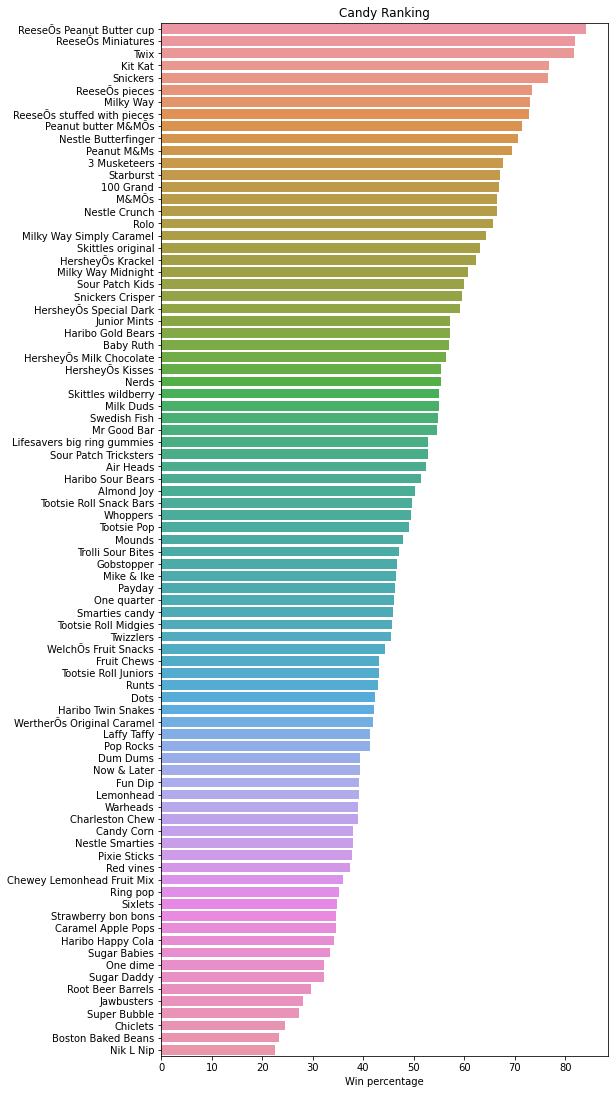

In [9]:
import seaborn as sns
plt.figure(figsize=(8,19))
sns.barplot(x=data["winpercent"],y=data["competitorname"],order=data[["competitorname","winpercent"]].sort_values(by="winpercent",ascending=False).iloc[:,0])
plt.xlabel("Win percentage")
plt.ylabel("")
plt.title("Candy Ranking")

There are no absolute winners or losers in the 85 different types of candies, but there candies that win more than 80% of the time are Reese's Peanut Butter cup, Reese's Miniatures and Twix while the least favourite candies are Nik L Nip, Boston Baked Beans and Chiclets.

<ipython-input-10-c06a576e1509>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(data.corr(),dtype=np.bool)


Text(0.5, 1.0, 'Candy characteristics correlation')

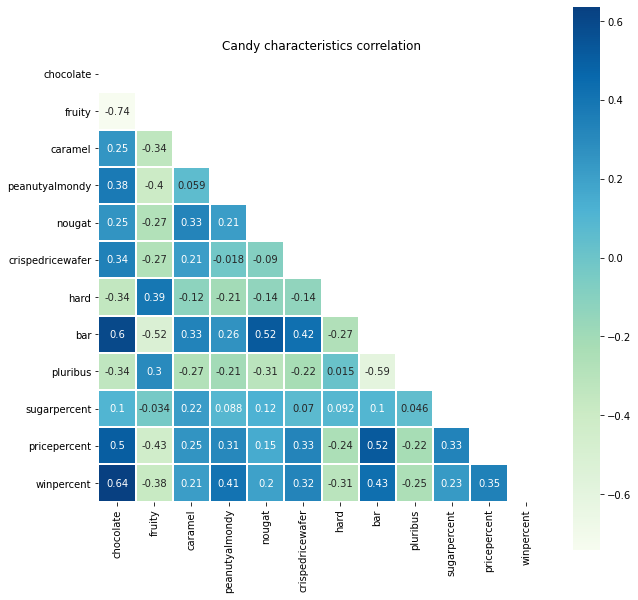

In [10]:
plt.figure(figsize=(10,10))
mask=np.zeros_like(data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=data.corr(),annot=True,square=True,mask=mask,cmap="GnBu",linewidths=1,linecolor="white")
plt.title("Candy characteristics correlation")

- Having chocolate in the candy would give a high win percentage, followed by being a bar candy and having peanuts/peanut butter/almonds
- Chocolate or nougat in the candy would usually come in the form of a bar as opposed to pluribus candies
- Chocolate or a bar candy would also be a more expensive candy, while fruity candies would be less expensive
- Fruity candies, as compared to the others, are more likely to be a hard candy
- Chocolate are not usually found in fruity candies

In [11]:
def grapher(colm,titled,labe,colr):
    fig,axes=plt.subplots(1,2,figsize=(10,4))
    data[colm].value_counts().plot(kind="pie",autopct="%1.1f%%",startangle=90,colors=colr,labels=labe,explode=[0,0.05],ax=axes[0])
    sns.swarmplot(x=data[colm],y=data["winpercent"],palette=colr,ax=axes[1])
    axes[0].set_xlabel("")
    axes[1].set_xlabel("")
    axes[0].set_ylabel("")
    axes[1].set_ylabel("Win percentage")
    axes[1].set_xticklabels(labe)
    plt.suptitle(titled,fontweight="bold",fontsize=16,y=1.05)
    plt.tight_layout()
    plt.show()

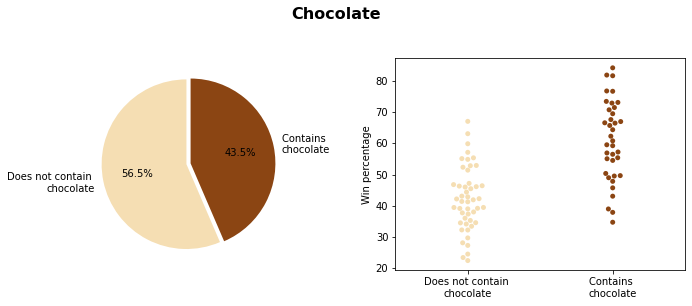

In [12]:
grapher("chocolate","Chocolate",["Does not contain \nchocolate","Contains \nchocolate"],["wheat","saddlebrown"])

43% of the candies contain chocolate, and those that do have a higher win percentage.

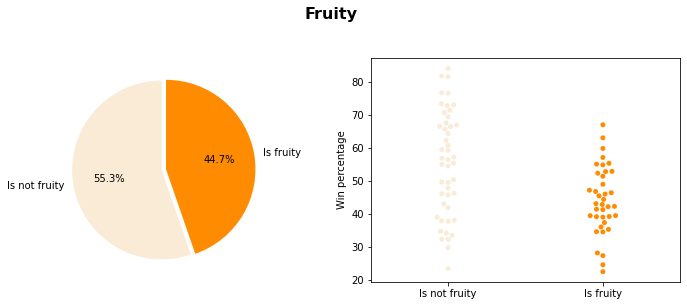

In [13]:
grapher("fruity","Fruity",["Is not fruity","Is fruity"],["antiquewhite","darkorange"])

There are more candies that have a fruity flavour that those that contain chocolate. Unfortunately the fruity flavour does not mean a higher win percentage though.

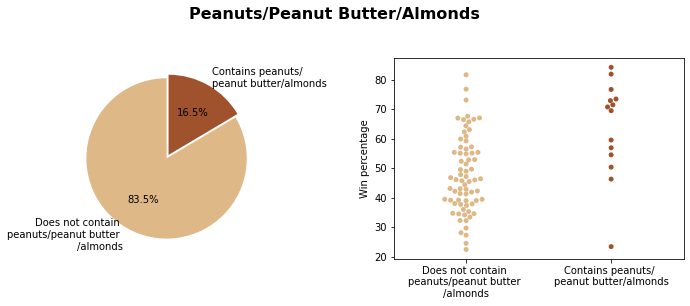

In [14]:
grapher("peanutyalmondy","Peanuts/Peanut Butter/Almonds",["Does not contain \npeanuts/peanut butter \n/almonds","Contains peanuts/ \npeanut butter/almonds"],["burlywood","sienna"])

Again, candies containing peanuts/peanut butter/almonds only account for 16% of the candies, which may be due to the manufacturers accounting for people with nut allergies. Candies without any peanuts/peanut butter/almonds does not an affect on the win percentage, but people seem to have polarising views when peanuts/peanut butter/almonds are present.

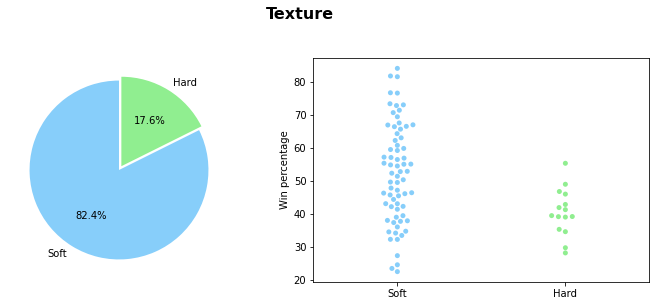

In [15]:
grapher("hard","Texture",["Soft","Hard"],["lightskyblue","lightgreen"])

Hard candies make up 17% of the 85 candies, and actually have a lower win percentage. On the other hand, soft candies don't necessarily have a higher win percentage, but people don't seem too bothered about the softness.

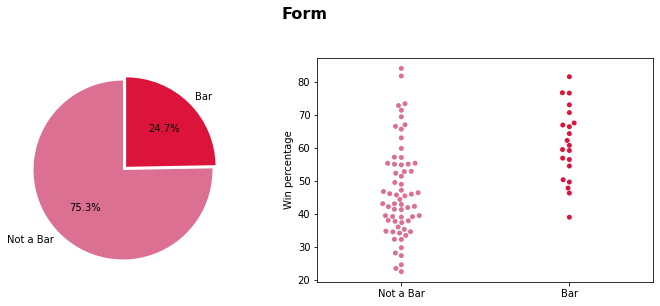

In [16]:
grapher("bar","Form",["Not a Bar","Bar"],["palevioletred","crimson"])

Bar candies make up almost one quarter of the candies, and are generally more favoured over non bar candies.

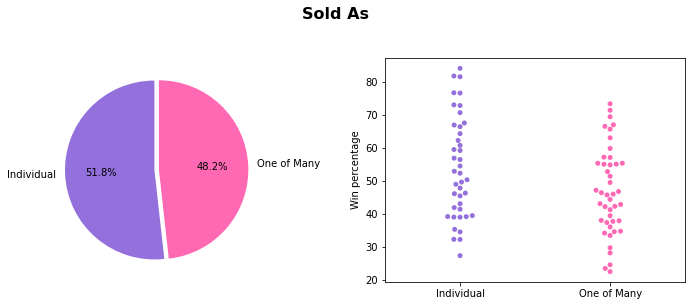

In [17]:
grapher("pluribus","Sold As",["Individual","One of Many"],["mediumpurple","hotpink"])

Almost half-half, but people seem to enjoy individual candies rather that those being one of many in a bag.

In [18]:
data.chocolate.value_counts()

0    48
1    37
Name: chocolate, dtype: int64

Lets look at some of the main combinations along with chocolate

<AxesSubplot:xlabel='chocolate', ylabel='count'>

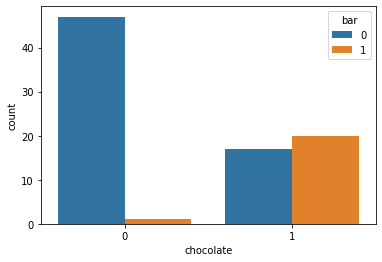

In [19]:
sns.countplot(x = 'chocolate', hue = 'bar', data = data)

Candies with chocolate flavour and bar shaped are more 

<AxesSubplot:xlabel='chocolate', ylabel='count'>

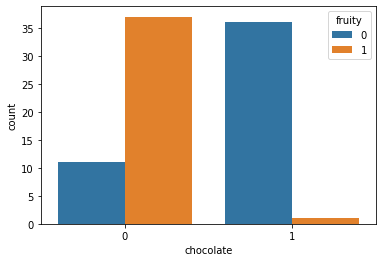

In [20]:
sns.countplot(x = 'chocolate', hue = 'fruity', data = data)

There are less candies with chocolate flavour and fruity favour

<AxesSubplot:xlabel='chocolate', ylabel='count'>

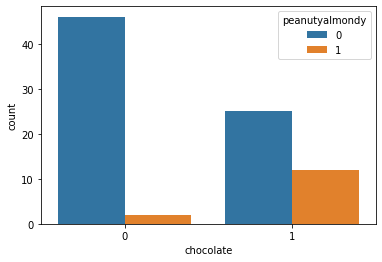

In [21]:
sns.countplot(x = 'chocolate', hue = 'peanutyalmondy', data = data)

Chocolate and peanutyalmong flavors go well together, thus they are more in number

## Splitting the Data

In [22]:
y = data['chocolate']
x = data.drop(['chocolate','competitorname'], axis=1)

In [23]:
y

0     1
1     1
2     0
3     0
4     0
     ..
80    0
81    0
82    0
83    0
84    1
Name: chocolate, Length: 85, dtype: int64

In [24]:
x

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...
80,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

## Applying SVC

In [26]:
from sklearn.svm import SVC
SVMmodel = SVC()
SVMmodel.fit(X_train, y_train)
predictions_y = SVMmodel.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test,predictions_y)
svm_cm

array([[10,  1],
       [ 4, 11]], dtype=int64)

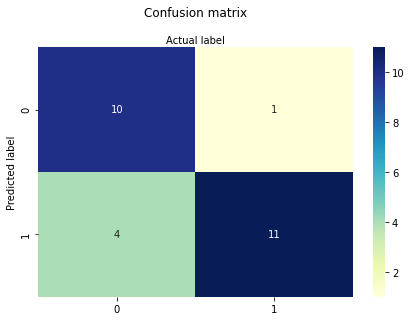

In [43]:
class_names=[1,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(svm_cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

- True positive: 10 (We predicted a positive result and it was positive i.e., 10 times the model predicted 1 as 1)
- True negative: 11 (We predicted a negative result and it was negative i.e., 11 times the model predicted 0 as 0)
- False positive: 1 (We predicted a positive result and it was negative i.e., 1 time the model predicted 0 as 1)
- False negative: 4 (We predicted a negative result and it was positive i.e., 4 times the model predicted 1 as 0)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test,predictions_y)
accuracy_svm

0.8076923076923077

## Applying Logistics regression 

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
log_cm = confusion_matrix(y_test,y_pred)
log_cm

array([[10,  1],
       [ 1, 14]], dtype=int64)

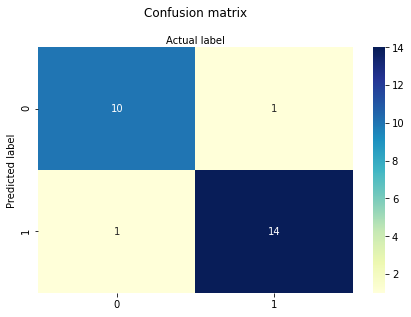

In [47]:
class_names=[1,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(log_cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

- True positive: 10 (We predicted a positive result and it was positive i.e., 10 times the model predicted 1 as 1)
- True negative: 14 (We predicted a negative result and it was negative i.e., 14 times the model predicted 0 as 0)
- False positive: 1 (We predicted a positive result and it was negative i.e., 1 time the model predicted 0 as 1)
- False negative: 1 (We predicted a negative result and it was positive i.e., 1 time the model predicted 1 as 0)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_logit = accuracy_score(y_test,y_pred)
accuracy_logit

0.9230769230769231

## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
treeModel = DecisionTreeClassifier()
treeModel.fit(X_train, y_train)
y_predict = treeModel.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
dc_cm = confusion_matrix(y_test,y_predict)
dc_cm

array([[10,  1],
       [ 1, 14]], dtype=int64)

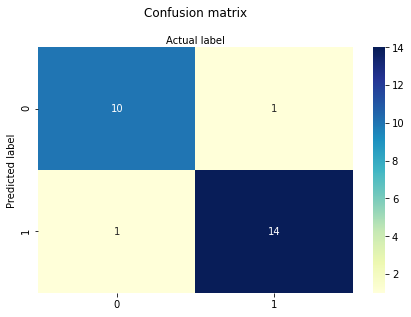

In [51]:
class_names=[1,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(dc_cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

- True positive: 10 (We predicted a positive result and it was positive i.e., 10 times the model predicted 1 as 1)-
- True negative: 14 (We predicted a negative result and it was negative i.e., 14 times the model predicted 0 as 0)
- False positive: 1 (We predicted a positive result and it was negative i.e., 1 time the model predicted 0 as 1)
- False negative: 1 (We predicted a negative result and it was positive i.e., 1 time the model predicted 1 as 0)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9615384615384616

In [38]:
pd.DataFrame({'Classifier':['SVM','Logistics Regression','Decision Tree'],'Accuracy score':[
accuracy_svm,accuracy_logit,accuracy]})

,Classifier,Accuracy score
0,SVM,0.807692
1,Logistics Regression,0.923077
2,Decision Tree,0.961538


### Conclusion: Out of the three models, decision tree is the best model for this dataset